In [1]:
# get data lists
#from nipype.interfaces.ants import ANTS
#from nipype.interfaces import fsl
import nipype.interfaces.io as nio

PD_ICA_file='/templateflow/PD_ICAs';
ICs_list=list(range(30))
ICs_list=["{:0>4d}".format(x) for x in ICs_list]
# file import
ds_ic = nio.DataGrabber(infields=['IC_id'])
ds_ic.inputs.base_directory = PD_ICA_file # database
ds_ic.inputs.template = 'melodic_IC_%4s.nii.gz' # from cwd
ds_ic.inputs.sort_filelist = True
ds_ic.inputs.IC_id = ICs_list
res_ic = ds_ic.run()
ic_list=res_ic.outputs.outfiles
#print(t1_list)
current_group='HC'
PD_LIST = '/codes/PD_ICA.list'
NC_LIST = '/codes/HC_ICA.list'
with open(PD_LIST, 'r') as f_sub:
    pd_list = f_sub.readlines()
pd_list = [x[0:-1] for x in pd_list] # remove \n
with open(NC_LIST, 'r') as f_sub:
    nc_list = f_sub.readlines()
nc_list = [x[0:-1] for x in nc_list]
print(len(pd_list), pd_list)
print(len(nc_list), nc_list)
NC_dir='/output/sMRI/HC-Jacobian'
PD_dir='/output/sMRI/PD_Jacobian'
# file import
ds_pd_jacobian = nio.DataGrabber(infields=['sub_id'])
ds_pd_jacobian.inputs.base_directory = PD_dir # database
ds_pd_jacobian.inputs.template = '%s_desc-preproc_T1w_space-MNI2009c_Warp_Jacobian.nii.gz' # from cwd
ds_pd_jacobian.inputs.sort_filelist = True
ds_pd_jacobian.inputs.sub_id = pd_list
res_pd_jacobian = ds_pd_jacobian.run()
pd_jacobian_list=res_pd_jacobian.outputs.outfiles
#print(len(pd_jacobian_list), pd_jacobian_list)
#
ds_nc_jacobian = nio.DataGrabber(infields=['sub_id'])
ds_nc_jacobian.inputs.base_directory = NC_dir # database
ds_nc_jacobian.inputs.template = '%s_desc-preproc_T1w_space-MNI2009c_Warp_Jacobian.nii.gz' # from cwd
ds_nc_jacobian.inputs.sort_filelist = True
ds_nc_jacobian.inputs.sub_id = nc_list
res_nc_jacobian = ds_nc_jacobian.run()
nc_jacobian_list=res_nc_jacobian.outputs.outfiles
#print(len(nc_jacobian_list), nc_jacobian_list)

48 ['sub-0002', 'sub-0004', 'sub-0005', 'sub-0006', 'sub-0008', 'sub-0012', 'sub-0014', 'sub-0015', 'sub-0018', 'sub-0020', 'sub-0021', 'sub-0022', 'sub-0023', 'sub-0024', 'sub-0025', 'sub-0026', 'sub-0027', 'sub-0028', 'sub-0029', 'sub-0030', 'sub-0031', 'sub-0034', 'sub-0035', 'sub-0037', 'sub-0038', 'sub-0040', 'sub-0047', 'sub-0051', 'sub-0052', 'sub-0068', 'sub-0075', 'sub-0076', 'sub-0087', 'sub-0094', 'sub-0096', 'sub-0098', 'sub-0103', 'sub-0111', 'sub-0118', 'sub-0125', 'sub-0126', 'sub-0129', 'sub-0131', 'sub-0132', 'sub-0133', 'sub-0136', 'sub-1000', 'sub-1020']
34 ['sub-0039', 'sub-0041', 'sub-0042', 'sub-0043', 'sub-0044', 'sub-0053', 'sub-0057', 'sub-0058', 'sub-0060', 'sub-0062', 'sub-0064', 'sub-0066', 'sub-0067', 'sub-0071', 'sub-0072', 'sub-0077', 'sub-0078', 'sub-0079', 'sub-0080', 'sub-0082', 'sub-0083', 'sub-0085', 'sub-0100', 'sub-0102', 'sub-0104', 'sub-0107', 'sub-0108', 'sub-0110', 'sub-0113', 'sub-0117', 'sub-0121', 'sub-0124', 'sub-0128', 'sub-0130']


0.020227251868390514
235818 235818
235818 235818


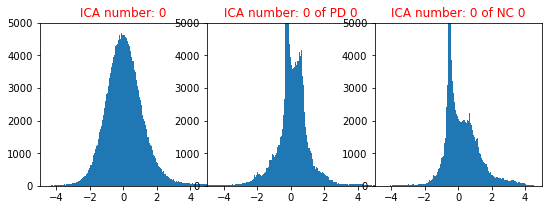

0.020227251868390514
235818 235818
235818 235818


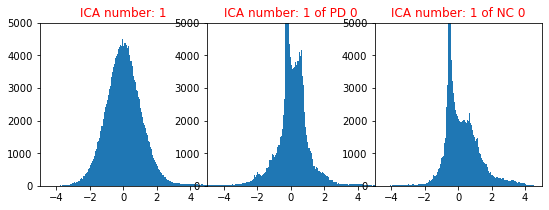

0.020227251868390514
235818 235818
235818 235818


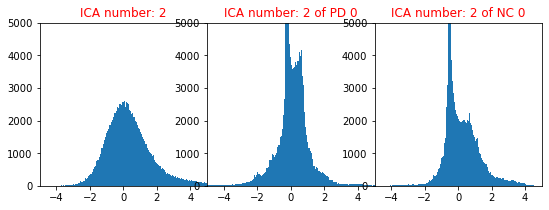

0.020227251868390514
235818 235818
235818 235818


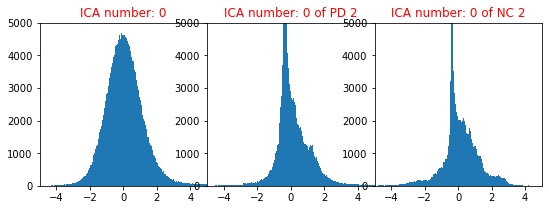

0.020227251868390514
235818 235818
235818 235818


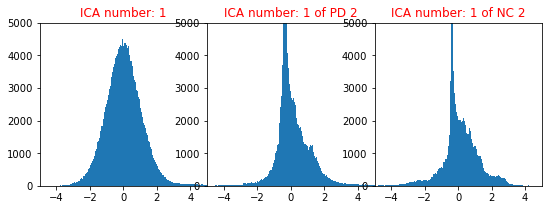

0.020227251868390514
235818 235818
235818 235818


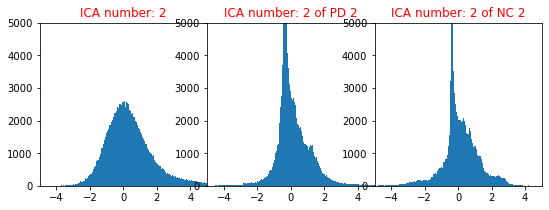

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
from nilearn import plotting
def ic_plot(i_IC, i_sub, ic_list, pd_list, nc_list):
    import nibabel as nib
    import numpy as np
    from scipy import stats
    import matplotlib.pyplot as plt
    img = nib.load(ic_list[i_IC]);   data = img.get_fdata()
    img1 = nib.load(pd_list[i_sub]); data1 = img1.get_fdata()
    img2 = nib.load(nc_list[i_sub]); data2 = img2.get_fdata()
    #X = stats.zscore(np.asarray(data))
    IC_val=data.ravel()[np.flatnonzero(data)]
    nz_pos=np.flatnonzero(data)
    pd_val=stats.zscore(data1.ravel()[nz_pos])
    nc_val=stats.zscore(data2.ravel()[nz_pos])
    print(len(IC_val)*.1/len(data.flatten())); print(len(pd_val),len(pd_val))
    print(len(nc_val),len(nc_val))
    Y_ULIM=5000; N_BINs=500;
    fig, ax = plt.subplots(1,3, figsize=[9, 3])
    ax[0].hist(IC_val, bins=N_BINs)
    ax[0].set_ylim([0,Y_ULIM])
    ax[0].set_xlim([-5,5])
    ax[0].set_title('ICA number: {}'.format(i_IC), color='r')

    ax[1].hist(pd_val, bins=N_BINs)
    ax[1].set_ylim([0,Y_ULIM])
    ax[1].set_xlim([-5,5])
    ax[1].set_title('ICA number: {} of PD {}'.format(i_IC,i_sub), color='r')

    ax[2].hist(nc_val, bins=N_BINs)
    ax[2].set_ylim([0,Y_ULIM])
    ax[2].set_xlim([-5,5])
    ax[2].set_title('ICA number: {} of NC {}'.format(i_IC,i_sub), color='r')

    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()
#
pd_list=pd_jacobian_list; nc_list=nc_jacobian_list;
i_IC=1; i_sub=0 
ic_plot(0, i_sub, ic_list, pd_list, nc_list)
ic_plot(1, i_sub, ic_list, pd_list, nc_list)
ic_plot(2, i_sub, ic_list, pd_list, nc_list)
i_sub=2
ic_plot(0, i_sub, ic_list, pd_list, nc_list)
ic_plot(1, i_sub, ic_list, pd_list, nc_list)
ic_plot(2, i_sub, ic_list, pd_list, nc_list)

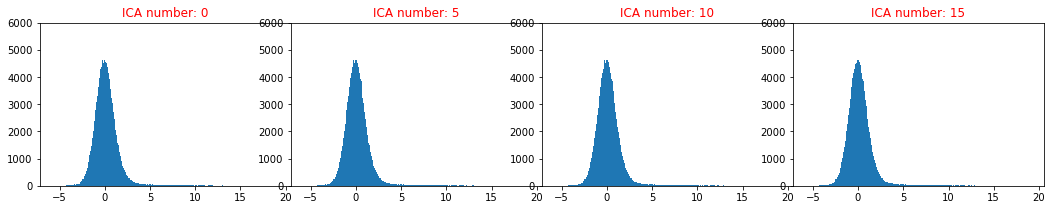

In [5]:
#cross product prediction

import matplotlib.pyplot as plt
import nibabel as nib


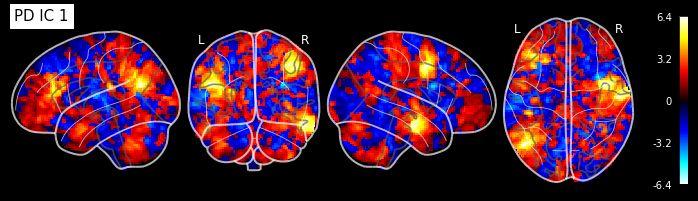

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
plotting.plot_glass_brain(ic_list[29], title='PD IC 1', display_mode='lyrz',
                          black_bg=True, colorbar=True, plot_abs=False)

In [49]:
img = nib.load(ic_list[i_IC]);   data = img.get_fdata()
img1 = nib.load(pd_list[i_sub]); data1 = img1.get_fdata()
img2 = nib.load(nc_list[i_sub]); data2 = img2.get_fdata()

True